In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random 

In [2]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout, TimeDistributed
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
random.seed(123)

In [4]:
df = pd.read_csv("datasets\covid19postvaxstatewidestats.csv")

df = df[df['unvaccinated_cases_per_100k'].notna()]

df = df.reset_index(drop=True)


<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\dangn\AppData\Local\Temp\ipykernel_13660\696560608.py:1: SyntaxWarning: invalid escape sequence '\c'
  df = pd.read_csv("datasets\covid19postvaxstatewidestats.csv")


In [5]:
df_unvac = df[['unvaccinated_cases_per_100k', 'unvaccinated_hosp_per_100k', 'unvaccinated_deaths_per_100k']]

df_unvac

,unvaccinated_cases_per_100k,unvaccinated_hosp_per_100k,unvaccinated_deaths_per_100k
0,27.251295,1.483401,0.067702
1,25.072362,1.360519,0.078033
2,23.268146,1.296892,0.087677
3,21.766329,1.236441,0.099877
4,20.467271,1.179528,0.112219
...,...,...,...
778,8.425650,0.613146,0.051096
779,8.210084,0.564715,0.048550
780,8.268116,0.552060,0.048561
781,8.157356,0.570069,0.061353


In [6]:
def sequence_data(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), :])
        y.append(data[i+time_step,:])
    return np.array(X), np.array(y)

In [7]:
split_index = int(len(df_unvac) * 0.8)

train_data = df_unvac[:split_index].values
test_data = df_unvac[split_index:].values

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# train_data = scaler.fit_transform(train_data)
# test_data = scaler.transform(test_data)

X_train, y_train = sequence_data(train_data, 10)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])

X_test, y_test = sequence_data(test_data, 10)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

In [8]:
X_train.shape

(615, 10, 3)

In [11]:
y_train.shape

(615, 3)

In [9]:

model = Sequential()

model.add(LSTM(128, return_sequences=True, input_shape=(10, 3)))

# TimeDistributed Dense layer applies a Dense(64) layer to each time step of the sequence
model.add(TimeDistributed(Dense(64, activation='relu')))

# Final Dense layer to predict 3 outputs for each time step
model.add(TimeDistributed(Dense(3)))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Print the model summary
model.summary()

C:\Users\dangn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 128)        │        67,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 10, 64)         │         8,256 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 10, 3)          │           195 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 76,035 (297.01 KB)

 Trainable params: 76,035 (297.01 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
# model = load_model("models\multivariate_unvac.keras")

Epoch 1/100


InvalidArgumentError: Graph execution error:

Detected at node gradient_tape/compile_loss/mse/sub/BroadcastGradientArgs defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\dangn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>

  File "C:\Users\dangn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "C:\Users\dangn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "C:\Users\dangn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.1520.0_x64__qbz5n2kfra8p0\Lib\asyncio\base_events.py", line 641, in run_forever

  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.1520.0_x64__qbz5n2kfra8p0\Lib\asyncio\base_events.py", line 1986, in _run_once

  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.1520.0_x64__qbz5n2kfra8p0\Lib\asyncio\events.py", line 88, in _run

  File "C:\Users\dangn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue

  File "C:\Users\dangn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\ipykernel\kernelbase.py", line 534, in process_one

  File "C:\Users\dangn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell

  File "C:\Users\dangn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\ipykernel\ipkernel.py", line 362, in execute_request

  File "C:\Users\dangn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\ipykernel\kernelbase.py", line 778, in execute_request

  File "C:\Users\dangn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\ipykernel\ipkernel.py", line 449, in do_execute

  File "C:\Users\dangn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "C:\Users\dangn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell

  File "C:\Users\dangn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell

  File "C:\Users\dangn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\async_helpers.py", line 128, in _pseudo_sync_runner

  File "C:\Users\dangn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async

  File "C:\Users\dangn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes

  File "C:\Users\dangn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code

  File "C:\Users\dangn\AppData\Local\Temp\ipykernel_13660\1441675366.py", line 1, in <module>

  File "C:\Users\dangn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\dangn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\backend\tensorflow\trainer.py", line 318, in fit

  File "C:\Users\dangn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\backend\tensorflow\trainer.py", line 121, in one_step_on_iterator

  File "C:\Users\dangn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\backend\tensorflow\trainer.py", line 108, in one_step_on_data

  File "C:\Users\dangn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\backend\tensorflow\trainer.py", line 70, in train_step

Incompatible shapes: [32,3] vs. [32,10,3]
	 [[{{node gradient_tape/compile_loss/mse/sub/BroadcastGradientArgs}}]] [Op:__inference_one_step_on_iterator_3376]

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


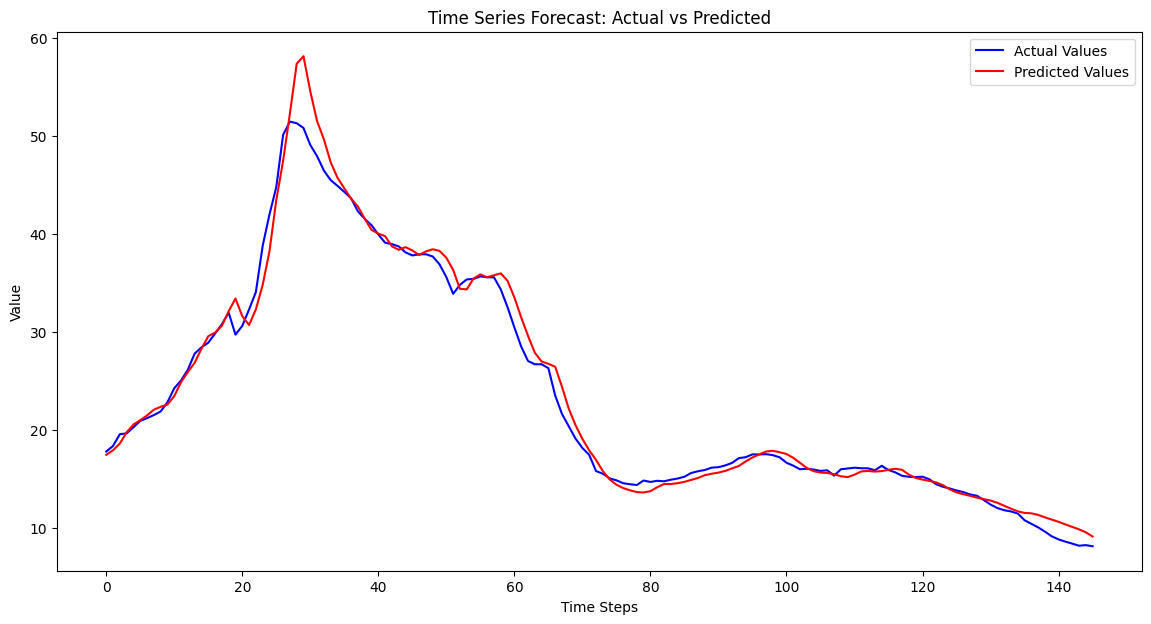

In [ ]:
predictions = model.predict(X_test)

plt.figure(figsize=(14, 7))
plt.plot(y_test[:,0], label='Actual Values', color='blue')
plt.plot(predictions[:,0], label='Predicted Values', color='red')
plt.title('Time Series Forecast: Actual vs Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:


mse = mean_squared_error(y_test[:,0], predictions[:,0])
r2 = r2_score(y_test[:,0], predictions[:,0])
mae = np.mean(np.abs(y_test[:,0] - predictions[:,0]))

print("Regression Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

final_val_loss = history.history['val_loss'][-1]
print(f"Final Validation Loss: {final_val_loss}")


Regression Metrics:
Mean Squared Error (MSE): 2.2240627716519
Mean Absolute Error (MAE): 0.9321783233673203
R-squared (R2): 0.9834659991022745
Final Validation Loss: 0.7669328451156616


In [ ]:
df_vac = df[['vaccinated_cases_per_100k', 'vaccinated_hosp_per_100k', 'vaccinated_deaths_per_100k']]

df_vac

,vaccinated_cases_per_100k,vaccinated_hosp_per_100k,vaccinated_deaths_per_100k
0,3.805800,0.092076,0.000000
1,3.546032,0.085105,0.000000
2,3.120234,0.078661,0.000000
3,2.991090,0.072953,0.000000
4,3.109945,0.091469,0.000000
...,...,...,...
778,3.002135,0.266944,0.027189
779,2.952661,0.251122,0.029166
780,2.931858,0.250130,0.029660
781,2.942200,0.241723,0.029659


In [ ]:
df_vac = df_vac[df_vac['vaccinated_cases_per_100k'].notna()]

df_vac

,vaccinated_cases_per_100k,vaccinated_hosp_per_100k,vaccinated_deaths_per_100k
0,3.805800,0.092076,0.000000
1,3.546032,0.085105,0.000000
2,3.120234,0.078661,0.000000
3,2.991090,0.072953,0.000000
4,3.109945,0.091469,0.000000
...,...,...,...
778,3.002135,0.266944,0.027189
779,2.952661,0.251122,0.029166
780,2.931858,0.250130,0.029660
781,2.942200,0.241723,0.029659


In [ ]:
split_index = int(len(df_vac) * 0.8)

train_vac = df_vac[:split_index].values
test_vac = df_vac[split_index:].values


X_train1, y_train1 = sequence_data(train_vac, 10)
X_train1 = X_train1.reshape(X_train1.shape[0], X_train1.shape[1], X_train1.shape[2])

X_test1, y_test1 = sequence_data(test_vac, 10)
X_test1 = X_test1.reshape(X_test1.shape[0], X_test1.shape[1], X_test1.shape[2])

In [ ]:
X_train1.shape

(615, 10, 3)

In [ ]:
model_vac = Sequential()
model_vac.add(LSTM(40, input_shape = (10,3)))
model_vac.add(Dense(20, activation='relu'))
model_vac.add(Dense(20, activation='relu'))
model_vac.add(Dropout(0.2))
model_vac.add(Dense(3))

model_vac.compile(optimizer= Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

C:\Users\dangn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history1 = model_vac.fit(X_train1, y_train1, epochs=100, batch_size=32, validation_data=(X_test1, y_test1))

# model_vac = load_model("models\multivariate_vac.keras")

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 572.5555 - mae: 6.7901 - val_loss: 29.4427 - val_mae: 2.9485
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 658.1705 - mae: 7.0976 - val_loss: 19.1361 - val_mae: 2.4342
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 611.3651 - mae: 6.6524 - val_loss: 8.4834 - val_mae: 1.6876
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 417.1705 - mae: 4.9225 - val_loss: 1.7610 - val_mae: 0.8450
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 462.7645 - mae: 4.9625 - val_loss: 0.7174 - val_mae: 0.5274
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 399.0736 - mae: 3.9225 - val_loss: 0.3990 - val_mae: 0.4402
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 296.6306 - mae: 3.4749 - val_loss: 0.1263 - val_mae: 0.2411
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 237.7821 - mae: 3.0137 - val_loss: 0.3754 - val_mae: 0.3593
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step


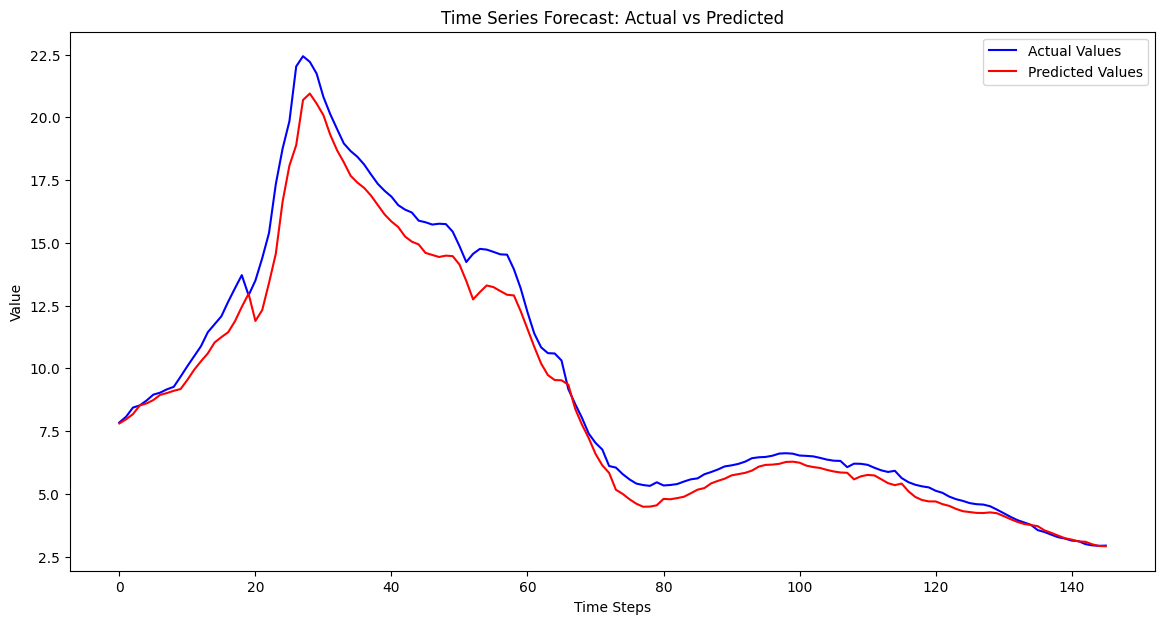

In [ ]:
predictions_vac = model_vac.predict(X_test1)

plt.figure(figsize=(14, 7))
plt.plot(y_test1[:,0], label='Actual Values', color='blue')
plt.plot(predictions_vac[:,0], label='Predicted Values', color='red')
plt.title('Time Series Forecast: Actual vs Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
# from sklearn.metrics import mean_squared_error, r2_score

# mse = mean_squared_error(y_test[:,0], predictions[:,0])
# r2 = r2_score(y_test[:,0], predictions[:,0])
# mae = np.mean(np.abs(y_test[:,0] - predictions[:,0]))

# print("Regression Metrics:")
# print(f"Mean Squared Error (MSE): {mse}")
# print(f"Mean Absolute Error (MAE): {mae}")
# print(f"R-squared (R2): {r2}")


In [ ]:
forecast = 30

forecast_unvac = df_unvac[-10:].values
forecast_vac = df_vac[-10:].values

forecast_unvac = forecast_unvac.reshape((1,10,3))
forecast_vac = forecast_vac.reshape((1,10,3))

In [ ]:
predictions_unvac = []
predictions_vac = []

for i in range(forecast):
    next_unvac = model.predict(forecast_unvac)
    next_vac = model_vac.predict(forecast_vac)

    next_unvac = next_unvac.reshape((1,1,3))
    next_vac = next_vac.reshape((1,1,3))

    forecast_unvac = np.append(forecast_unvac[:, 1:, :], next_unvac, axis = 1)
    forecast_vac = np.append(forecast_vac[:, 1:, :], next_vac, axis = 1)

    predictions_unvac.append(next_unvac[0, -1, 0])
    predictions_vac.append(next_vac[0, -1, 0])


predictions_unvac = np.array(predictions_unvac)
predictions_vac = np.array(predictions_vac)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━

In [ ]:
last_df = df[['date', 'unvaccinated_cases_per_100k']]

last_df = last_df[last_df['unvaccinated_cases_per_100k'].notnull()]

last_df

,date,unvaccinated_cases_per_100k
0,2021-02-07,27.251295
1,2021-02-08,25.072362
2,2021-02-09,23.268146
3,2021-02-10,21.766329
4,2021-02-11,20.467271
...,...,...
778,2023-03-27,8.425650
779,2023-03-28,8.210084
780,2023-03-29,8.268116
781,2023-03-30,8.157356


In [ ]:
last_date = last_df['date'].iloc[-1]

last_date

next_month = pd.date_range(start = last_date, periods = 31, closed = 'right')

next_month

C:\Users\dangn\AppData\Local\Temp\ipykernel_4448\3089131202.py:5: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  next_month = pd.date_range(start = last_date, periods = 31, closed = 'right')


DatetimeIndex(['2023-04-01', '2023-04-02', '2023-04-03', '2023-04-04',
               '2023-04-05', '2023-04-06', '2023-04-07', '2023-04-08',
               '2023-04-09', '2023-04-10', '2023-04-11', '2023-04-12',
               '2023-04-13', '2023-04-14', '2023-04-15', '2023-04-16',
               '2023-04-17', '2023-04-18', '2023-04-19', '2023-04-20',
               '2023-04-21', '2023-04-22', '2023-04-23', '2023-04-24',
               '2023-04-25', '2023-04-26', '2023-04-27', '2023-04-28',
               '2023-04-29', '2023-04-30'],
              dtype='datetime64[ns]', freq='D')

(array([19448., 19452., 19456., 19460., 19464., 19468., 19472., 19476.,
        19478.]),
 [Text(19448.0, 0, '2023-04-01'),
  Text(19452.0, 0, '2023-04-05'),
  Text(19456.0, 0, '2023-04-09'),
  Text(19460.0, 0, '2023-04-13'),
  Text(19464.0, 0, '2023-04-17'),
  Text(19468.0, 0, '2023-04-21'),
  Text(19472.0, 0, '2023-04-25'),
  Text(19476.0, 0, '2023-04-29'),
  Text(19478.0, 0, '2023-05-01')])

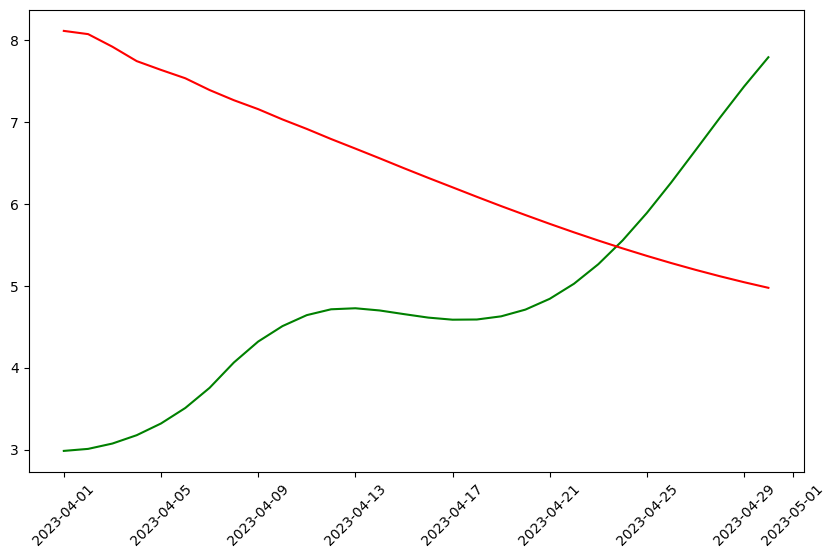

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(next_month, predictions_vac, color = 'g')
plt.plot(next_month, predictions_unvac, color = "r")
plt.xticks(rotation = 45)

In [ ]:
# model.save('models/multivariate_unvac.keras')
# model_vac.save('models/multivariate_vac.keras')

In [ ]:
#Full Forecast
date_index = df[df['date'] == '2023-01-01'].index[0]

print(date_index)

df_forecast = df[date_index:]

df_forecast

693


,date,area,area_type,unvaccinated_cases,vaccinated_cases,unvaccinated_hosp,vaccinated_hosp,unvaccinated_deaths,vaccinated_deaths,population_unvaccinated,population_vaccinated,unvaccinated_cases_per_100k,vaccinated_cases_per_100k,unvaccinated_hosp_per_100k,vaccinated_hosp_per_100k,unvaccinated_deaths_per_100k,vaccinated_deaths_per_100k
693,2023-01-01,California,State,825,1696,110,243,13,29,5734463,28862182,35.599298,14.528651,2.663097,0.973097,0.331330,0.109882
694,2023-01-02,California,State,1673,3522,115,228,16,24,5730657,28862788,34.364048,13.950241,2.512801,0.935461,0.314100,0.107900
695,2023-01-03,California,State,2328,4568,150,270,19,29,5726933,28863461,32.540479,13.186717,2.442095,0.908217,0.304326,0.103938
696,2023-01-04,California,State,1912,3509,130,233,0,33,5723196,28864177,30.492453,12.238601,2.341349,0.873549,0.244619,0.107894
697,2023-01-05,California,State,1517,3096,130,242,19,36,5719693,28864783,28.537995,11.387579,2.267854,0.853734,0.252261,0.109872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,2023-03-27,California,State,607,1016,33,83,4,7,5591769,28898483,8.425650,3.002135,0.613146,0.266944,0.051096,0.027189
779,2023-03-28,California,State,502,980,28,74,3,9,5590686,28898869,8.210084,2.952661,0.564715,0.251122,0.048550,0.029166
780,2023-03-29,California,State,539,924,37,81,3,7,5589458,28899278,8.268116,2.931858,0.552060,0.250130,0.048561,0.029660
781,2023-03-30,California,State,481,961,38,65,5,9,5588295,28899658,8.157356,2.942200,0.570069,0.241723,0.061353,0.029659


In [ ]:
df_forecast = df_forecast[['date', 'vaccinated_cases_per_100k', 'unvaccinated_cases_per_100k']]

df_forecast

,date,vaccinated_cases_per_100k,unvaccinated_cases_per_100k
693,2023-01-01,14.528651,35.599298
694,2023-01-02,13.950241,34.364048
695,2023-01-03,13.186717,32.540479
696,2023-01-04,12.238601,30.492453
697,2023-01-05,11.387579,28.537995
...,...,...,...
778,2023-03-27,3.002135,8.425650
779,2023-03-28,2.952661,8.210084
780,2023-03-29,2.931858,8.268116
781,2023-03-30,2.942200,8.157356


In [ ]:
df_predictions = pd.DataFrame({
    'date': next_month,
    'vaccinated_cases_per_100k' : predictions_vac,
    'unvaccinated_cases_per_100k': predictions_unvac   
})

df_predictions

,date,vaccinated_cases_per_100k,unvaccinated_cases_per_100k
0,2023-04-01,2.983539,7.441080
1,2023-04-02,3.008152,7.051321
2,2023-04-03,3.073503,6.581175
3,2023-04-04,3.175469,6.406181
4,2023-04-05,3.318736,6.276476
5,2023-04-06,3.508214,6.152796
6,2023-04-07,3.754277,6.035996
7,2023-04-08,4.064281,5.924539
8,2023-04-09,4.320129,5.818614
9,2023-04-10,4.508936,5.720500


In [ ]:
df_forecast['date'] = pd.to_datetime(df_forecast['date'])
df_predictions['date'] = pd.to_datetime(df_predictions['date'])

C:\Users\dangn\AppData\Local\Temp\ipykernel_4448\1894496729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_forecast['date'] = pd.to_datetime(df_forecast['date'])


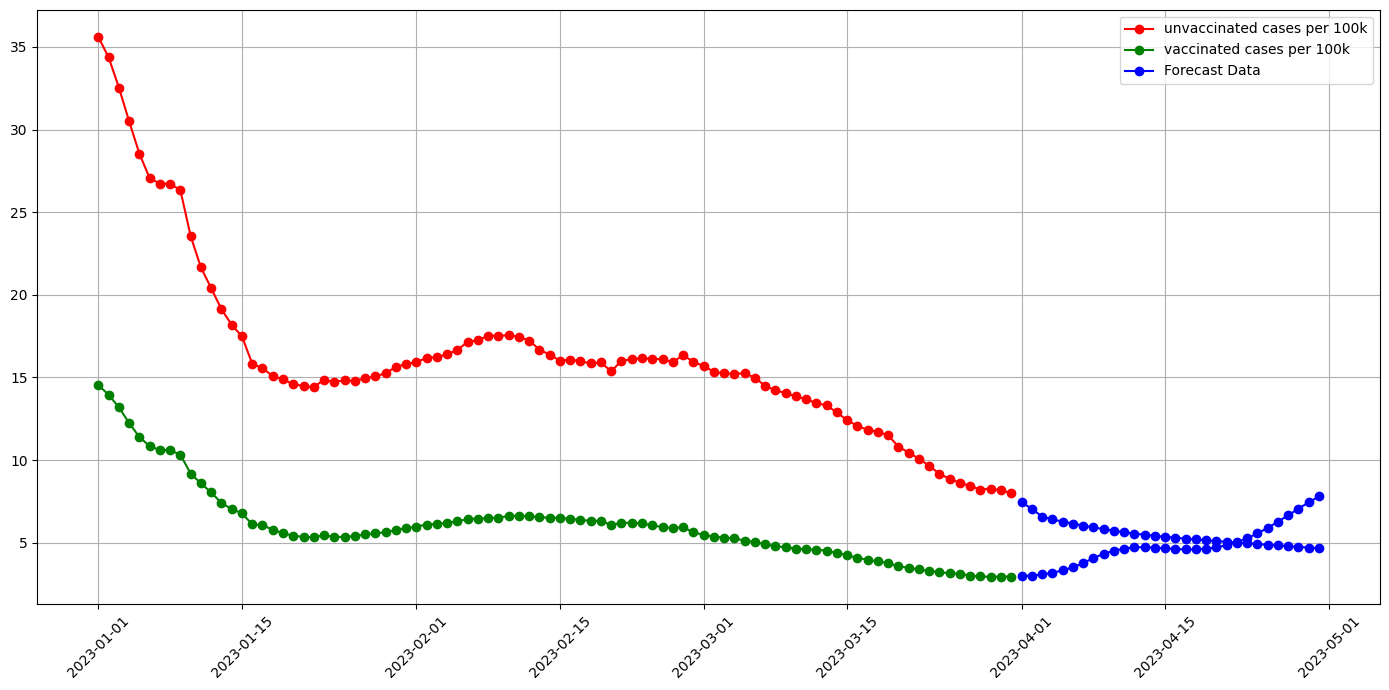

In [ ]:
plt.figure(figsize=(14, 7))

plt.plot(df_forecast['date'], df_forecast['unvaccinated_cases_per_100k'], label='unvaccinated cases per 100k', color='r', marker='o')
plt.plot(df_forecast['date'], df_forecast['vaccinated_cases_per_100k'], label='vaccinated cases per 100k', color='g', marker='o')
plt.plot(df_predictions['date'], df_predictions['unvaccinated_cases_per_100k'], label='Forecast Data', color='b', marker='o')

plt.xticks(rotation = 45)

plt.grid(True)

plt.legend()

plt.plot(df_predictions['date'], df_predictions['vaccinated_cases_per_100k'], label='Forecast Data', color='b', marker='o')

# plt.title('Unvaccinated Cases per 100k: Original vs Forecast')
# plt.xlabel('Date')
# plt.ylabel('Unvaccinated Cases per 100k')
# plt.xticks(rotation=45)
# plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
#Idea : We can make one model that predict both by changing the Dense layer to output 2 
#API : Access both multivariate
#Libary: Spit out a forecasting function

